In [1]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())




{29: 2, 45: 1, 17: 5, 28: 3, 44: 2, 57: 1, 13: 6, 21: 5, 24: 4, 18: 3, 35: 3, 23: 3, 48: 1, 54: 1, 19: 3, 38: 2, 41: 1, 12: 8, 7: 6, 6: 4, 5: 8, 22: 2, 15: 2, 3: 6, 40: 1, 14: 2, 30: 2, 2: 10, 27: 1, 1: 8, 11: 1, 32: 4, 64: 1, 20: 4, 33: 2, 10: 5, 4: 7, 37: 2, 8: 3, 39: 1, 9: 3, 43: 1, 34: 1, 16: 4, 25: 1, 31: 2}


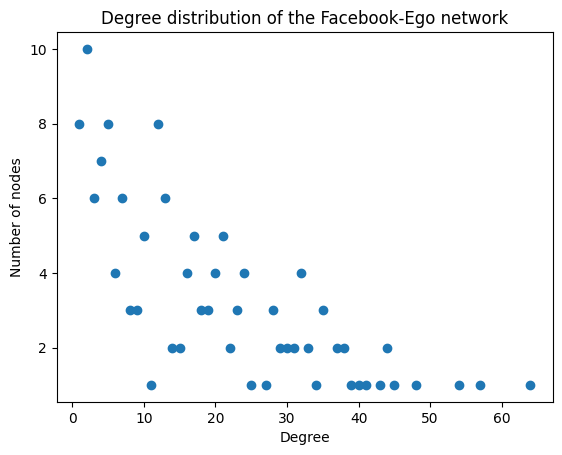

In [40]:
#Question (a)
# Calculate the degree sequence
degree_sequence = [d for n, d in facebook_network.degree()]
degree_count = dict()

for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

print(degree_count)
# Plot the degree distribution
plt.scatter(degree_count.keys(), degree_count.values())
plt.title("Degree distribution of the Facebook-Ego network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()



{28: 4, 50: 2, 12: 9, 54: 2, 29: 2, 62: 1, 19: 3, 21: 5, 18: 6, 13: 3, 45: 2, 49: 2, 31: 1, 38: 2, 40: 1, 23: 3, 6: 8, 8: 5, 9: 7, 11: 4, 4: 6, 15: 3, 25: 1, 3: 8, 20: 2, 27: 2, 32: 2, 24: 2, 7: 3, 41: 1, 44: 1, 16: 2, 10: 4, 26: 2, 42: 1, 39: 2, 5: 7, 17: 2, 22: 1, 1: 5, 2: 8, 14: 1}


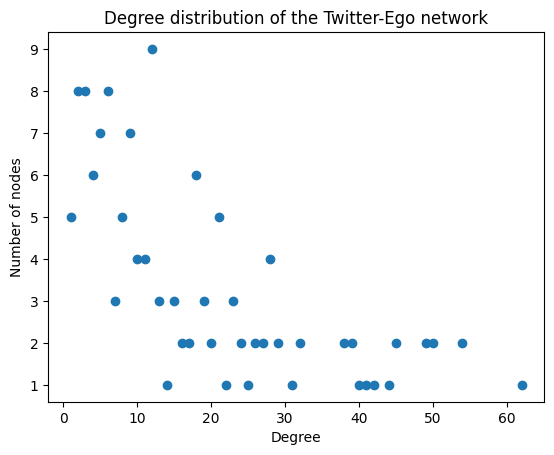

In [20]:
# Calculate the degree sequence
degree_sequence = [d for n, d in twitter_network.degree()]
degree_count = dict()
for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

print(degree_count)
# Plot the degree distribution
plt.scatter(degree_count.keys(), degree_count.values())
plt.title("Degree distribution of the Twitter-Ego network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()


In [21]:
##Question (b)
print("""

The provided degree distributions for the Facebook and Twitter networks offer insights into the number of nodes associated with each degree. To compare these networks to a random network, it is crucial to scrutinize the patterns within the degree distributions.

**Key Observations:**

1. **Facebook Network:**
   - There is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 8, 10).
   - The network has nodes with higher degrees (e.g., 12, 13, 15).
   - The distribution lacks a strict regularity.

2. **Twitter Network:**
   - Similarly to Facebook, there is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 7, 8, 9).
   - Higher degrees are present in the network (e.g., 12, 28, 50).
   - The distribution does not follow a strict regular pattern.

**Comparison with a Random Network:**

1. **Non-Random Patterns:**
   - Both networks exhibit non-random patterns in their degree distributions. In a completely random network, one would expect a more uniform degree distribution.
   - The presence of nodes with higher degrees in both networks suggests the existence of hubs or highly connected nodes.

2. **Preferential Attachment:**
   - Higher counts at specific degrees in both networks may indicate a form of preferential attachment. This implies that nodes with higher degrees are more likely to attract new connections.
   - This phenomenon is often observed in real-world networks and contributes to the formation of hubs.

3. **Community Structure:**
   - Although degree distributions alone do not provide information about community structure, the variability in degrees could indicate the presence of communities or clusters within the networks.

**Causes of Differences:**

1. **Purpose and Function:**
   - Real-world networks often have specific purposes or functions that influence their structure. Social networks like Facebook and Twitter are shaped by user behaviors and preferences, contributing to non-random patterns.

2. **Node Addition Mechanisms:**
   - How new nodes are added to the network can affect the degree distribution. If new nodes preferentially attach to existing nodes with higher degrees, this can lead to a distribution with hubs.

3. **Evolutionary Processes:**
   - Over time, networks evolve based on user interactions, preferences, and external factors. This evolutionary process can result in non-random structures.

In summary, the primary difference between the chosen networks (Facebook and Twitter) and a random network with the same number of nodes lies in the presence of non-random patterns, such as preferential attachment and degree variability. The causes of these differences are rooted in the purpose and function of the networks, node addition mechanisms, and evolutionary processes shaping the networks.

      
      """)




The provided degree distributions for the Facebook and Twitter networks offer insights into the number of nodes associated with each degree. To compare these networks to a random network, it is crucial to scrutinize the patterns within the degree distributions.

**Key Observations:**

1. **Facebook Network:**
   - There is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 8, 10).
   - The network has nodes with higher degrees (e.g., 12, 13, 15).
   - The distribution lacks a strict regularity.

2. **Twitter Network:**
   - Similarly to Facebook, there is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 7, 8, 9).
   - Higher degrees are present in the network (e.g., 12, 28, 50).
   - The distribution does not follow a strict regular pattern.

**Comparison with a Random Network:**

1. **Non-Random Patterns:**
   - Both networks exhibit non-random patterns in their degree distributions. In a completely random network, one 

In [23]:
##Question c

# Calculate the shortest path length between all pairs of nodes
shortest_path_lengths = dict(nx.shortest_path_length(facebook_network))

# Calculate the average shortest path length
avg_shortest_path_length = np.mean([length for source in shortest_path_lengths for length in shortest_path_lengths[source].values()])

print("The average shortest path length of the Facebook-Ego network is:", avg_shortest_path_length)

# Calculate the shortest path length between all pairs of nodes
shortest_path_lengths = dict(nx.shortest_path_length(twitter_network))

# Calculate the average shortest path length
avg_shortest_path_length = np.mean([length for source in shortest_path_lengths for length in shortest_path_lengths[source].values()])

print("The average shortest path length of the Twitter-Ego network is:", avg_shortest_path_length)


The average shortest path length of the Facebook-Ego network is: 2.446421096693177
The average shortest path length of the Twitter-Ego network is: 3.584276475343573


In [28]:
##Question d
#For facebook
# Assuming you have the Facebook-Ego network stored in the variable 'facebook_network'
random_nodes_facebook = random.sample(facebook_network.nodes(), k=5)

# Calculate and print clustering coefficient for each random node
for node in random_nodes_facebook:
    clustering_coefficient = nx.clustering(facebook_network, node)
    print(f"Clustering coefficient for node {node} in the Facebook-Ego network: {clustering_coefficient}")


Clustering coefficient for node 495 in the Facebook-Ego network: 0.580952380952381
Clustering coefficient for node 439 in the Facebook-Ego network: 0.39920948616600793
Clustering coefficient for node 351 in the Facebook-Ego network: 0.3333333333333333
Clustering coefficient for node 376 in the Facebook-Ego network: 0.3055555555555556
Clustering coefficient for node 457 in the Facebook-Ego network: 0.5303030303030303


/tmp/ipykernel_1457/1640849783.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes_facebook = random.sample(facebook_network.nodes(), k=5)


In [29]:
##Question d
#For twitter
# Assuming you have the Twitter-Ego network stored in the variable 'twitter_network'
random_nodes_twitter = random.sample(twitter_network.nodes(), k=5)

# Calculate and print clustering coefficient for each random node
for node in random_nodes_twitter:
    clustering_coefficient = nx.clustering(twitter_network, node)
    print(f"Clustering coefficient for node {node} in the Twitter-Ego network: {clustering_coefficient}")


Clustering coefficient for node 27816957 in the Twitter-Ego network: 1.0
Clustering coefficient for node 68606521 in the Twitter-Ego network: 0.15384615384615385
Clustering coefficient for node 19970709 in the Twitter-Ego network: 0.4879032258064516
Clustering coefficient for node 19586880 in the Twitter-Ego network: 0.5362637362637362
Clustering coefficient for node 113126125 in the Twitter-Ego network: 0.46545768566493956


/tmp/ipykernel_1457/1346842244.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes_twitter = random.sample(twitter_network.nodes(), k=5)


In [33]:
##Question e

# Calculate the average clustering coefficient of the network
avg_clustering_coefficient_facebook = nx.average_clustering(facebook_network)
# Calculate the average clustering coefficient of the network
avg_clustering_coefficient_twitter = nx.average_clustering(twitter_network)

print("The average clustering coefficient for the facebook-Ego network is:", avg_clustering_coefficient_facebook)
print("The average clustering coefficient for the Twitter-Ego network is:", avg_clustering_coefficient_twitter)

The average clustering coefficient for the facebook-Ego network is: 0.4900622304455071
The average clustering coefficient for the Twitter-Ego network is: 0.38527956693070126


In [36]:
##Question (f)

#For facebook_network
largest_component_facebook = max(nx.connected_components(facebook_network), key=len)
nodes_in_largest_component_facebook = list(largest_component_facebook)

print("Nodes in the largest component of the Facebook-Ego network:")
print(nodes_in_largest_component_facebook)




Nodes in the largest component of the Facebook-Ego network:
[34, 173, 349, 350, 352, 353, 354, 355, 356, 357, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 391, 392, 394, 395, 396, 397, 398, 400, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 442, 443, 444, 445, 446, 448, 449, 450, 451, 452, 453, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496]


In [38]:
# Assuming you have the Twitter-Ego network stored in the variable 'twitter_network'
strongly_connected_components_twitter = list(nx.strongly_connected_components(twitter_network))

# Find the largest strongly connected component
largest_component_twitter = max(strongly_connected_components_twitter, key=len)
nodes_in_largest_component_twitter = list(largest_component_twitter)

print("Nodes in the largest strongly connected component of the Twitter-Ego network:")
print(nodes_in_largest_component_twitter)


Nodes in the largest strongly connected component of the Twitter-Ego network:
[6054912, 199009284, 27998216, 19364873, 20136458, 17020962, 60923426, 14100010, 18953259, 194677810, 20039230, 19957312, 7861312, 289759808, 51171395, 19702854, 191477840, 12152402, 20777047, 90420314, 276963941, 17350250, 333449324, 388212339, 145852539, 18963070, 40196232, 8115852, 21966989, 30614676, 19970709, 44874400, 113134752, 31123109, 7846, 30104231, 19795629, 151232686, 30231735, 42861755, 160143038, 117848769, 21447363, 20015311, 268806872, 19233002, 113126125, 27825390, 34747631, 19129073, 15670515, 7111412, 14202104, 203694329, 19982092, 64496398, 17836026, 1976611, 44101412, 19095849, 19586880, 20083529, 18331980, 172814159, 15294801, 23873876, 20137301, 24737621, 352226135, 18265433, 181750109, 16464746, 1715051, 20079982, 39348085, 26465656, 33174013, 6353802, 53297035, 20230544, 297074078, 95233955, 66561957, 52613032, 78207918, 215952307, 18980276, 78129590, 20138935, 79312312, 538245048, 1